In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline

## Loads data and preprocess fields

In [2]:
#load the preprocessed youtube video dataset: it contains videos from tech review channels that are less than 20mins long
df_vd_tech = pd.read_csv("./tech_review_videos.tsv.gz", compression="infer", sep="\t")
#change upload_date from str to datetime type
df_vd_tech["upload_date"] = pd.to_datetime(df_vd_tech["upload_date"])

In [3]:
df_vd_tech.head()

,channel_id,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,num_comms,clean_title,clean_tags
0,UCzWQYUVCpZqtN93H8RR44Qw,87.0,ExOXF1x3N1g,292,7386.0,"current events,Science,biofuel,algae,power,Bio...",We Can Power The World With Algae!,2016-09-29,235974.0,700.0,"['power', 'world', 'algae']","['current', 'event', 'science', 'biofuel', 'al..."
1,UCzWQYUVCpZqtN93H8RR44Qw,36.0,_RhHuW2gglw,193,1933.0,"Energy (Dimension),testtube,fertilizer,human w...",How Poop Will Power The World,2013-09-15,92531.0,465.0,"['poop', 'power', 'world']","['energy', 'dimension', 'testtube', 'fertilize..."
2,UCzWQYUVCpZqtN93H8RR44Qw,34.0,g513EUHqkfw,191,2556.0,"social,networking,first impressions,judge,meet...",How First Impressions Work,2012-12-10,164020.0,248.0,"['first', 'impression', 'work']","['social', 'networking', 'first', 'impression'..."
3,UCzVy1DW9NFp4c910hMd_jIw,1.0,fRY3dpFBF14,217,72.0,"Sony,8K,Sony 8K,TV,2019 Sony 8K,8K Television,...",Sony 8K Z9G Master Series Smart TV,2019-08-23,2585.0,12.0,"['sony', 'master', 'series', 'smart', 'tv']","['sony', 'sony', 'tv', 'sony', 'television', '..."
4,UCzVy1DW9NFp4c910hMd_jIw,3.0,VenwYvLRa-I,437,107.0,"Bowers and Wilkins,B&W,Bowers,Wilkins,603,606,...",Bowers & Wilkins 600 Series Speaker Comparison,2019-08-13,5974.0,19.0,"['bower', 'wilkins', 'series', 'speaker', 'com...","['bower', 'wilkins', 'bower', 'wilkins', 'cent..."


In [4]:
#deep copy of the df
df_vd_tech_modif = df_vd_tech.copy() 
#change upload_date to only contain the year (without month and day) for future groupby operations
df_vd_tech_modif["upload_date"] = df_vd_tech_modif.apply(lambda x: x["upload_date"].strftime("%Y"), axis=1)

In [5]:
df_vd_tech_modif.head()

,channel_id,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,num_comms,clean_title,clean_tags
0,UCzWQYUVCpZqtN93H8RR44Qw,87.0,ExOXF1x3N1g,292,7386.0,"current events,Science,biofuel,algae,power,Bio...",We Can Power The World With Algae!,2016,235974.0,700.0,"['power', 'world', 'algae']","['current', 'event', 'science', 'biofuel', 'al..."
1,UCzWQYUVCpZqtN93H8RR44Qw,36.0,_RhHuW2gglw,193,1933.0,"Energy (Dimension),testtube,fertilizer,human w...",How Poop Will Power The World,2013,92531.0,465.0,"['poop', 'power', 'world']","['energy', 'dimension', 'testtube', 'fertilize..."
2,UCzWQYUVCpZqtN93H8RR44Qw,34.0,g513EUHqkfw,191,2556.0,"social,networking,first impressions,judge,meet...",How First Impressions Work,2012,164020.0,248.0,"['first', 'impression', 'work']","['social', 'networking', 'first', 'impression'..."
3,UCzVy1DW9NFp4c910hMd_jIw,1.0,fRY3dpFBF14,217,72.0,"Sony,8K,Sony 8K,TV,2019 Sony 8K,8K Television,...",Sony 8K Z9G Master Series Smart TV,2019,2585.0,12.0,"['sony', 'master', 'series', 'smart', 'tv']","['sony', 'sony', 'tv', 'sony', 'television', '..."
4,UCzVy1DW9NFp4c910hMd_jIw,3.0,VenwYvLRa-I,437,107.0,"Bowers and Wilkins,B&W,Bowers,Wilkins,603,606,...",Bowers & Wilkins 600 Series Speaker Comparison,2019,5974.0,19.0,"['bower', 'wilkins', 'series', 'speaker', 'com...","['bower', 'wilkins', 'bower', 'wilkins', 'cent..."


## 1. Video statistics

In [6]:
#get the avg number of likes per video for each year
df_vd_tech_modif_likes = df_vd_tech_modif.groupby("upload_date")[["like_count"]].mean()
#rename the column
df_vd_tech_modif_likes.columns = ["average_number_of_likes"]

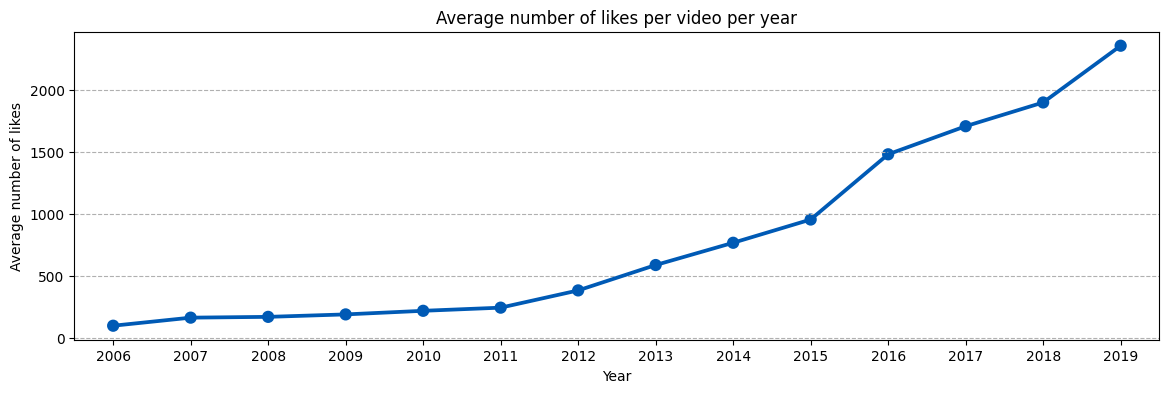

In [7]:
# Plot : Average number of likes per video per year
# Set up the subplots with the figure size (14,4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 4))
sns.pointplot(x=df_vd_tech_modif_likes.index,
              y='average_number_of_likes',
              errwidth=1.5,
              data=df_vd_tech_modif_likes,
              ax=axes,
              color='#005AB5')
axes.set_title('Average number of likes per video per year')
axes.set_ylabel('Average number of likes')
axes.set_xlabel('Year')
axes.grid(axis='y', linestyle='--')

We see from the above plot that the number of likes has been increasing across the years. Multiple reasons can justify this: for instance this could be due to better quality videos along the years or more users on the platform or more user engagement. 

In [8]:
#get the avg number of dislikes per video for each year
df_vd_tech_modif_dislikes = df_vd_tech_modif.groupby("upload_date")[["dislike_count"]].mean()
#rename the column
df_vd_tech_modif_dislikes.columns = ["average_number_of_dislikes"]

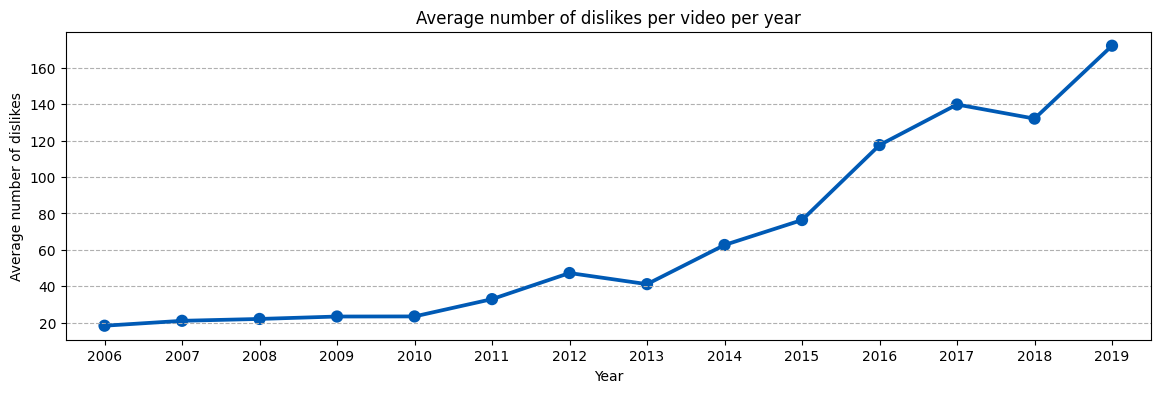

In [9]:
# Plot : Average number of dislikes per video per year
# Set up the subplots with the figure size (14,4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 4))
sns.pointplot(x=df_vd_tech_modif_dislikes.index,
              y='average_number_of_dislikes',
              errwidth=1.5,
              data=df_vd_tech_modif_dislikes,
              ax=axes,
              color='#005AB5')
axes.set_title('Average number of dislikes per video per year')
axes.set_ylabel('Average number of dislikes')
axes.set_xlabel('Year')
axes.grid(axis='y', linestyle='--')

We see from the above plot that the number of dislikes has been increasing across the years. Multiple reasons can justify this: for instance this could be due to more users on the platform or more user engagement (users engage with the content and give their opinion which can be positive or negative, instead of saying nothing). 

In [10]:
#get the avg duration per video for each year
df_vd_tech_modif_duration = df_vd_tech_modif.groupby("upload_date")[["duration"]].mean()
#rename the column
df_vd_tech_modif_duration.columns = ["average_duration"]

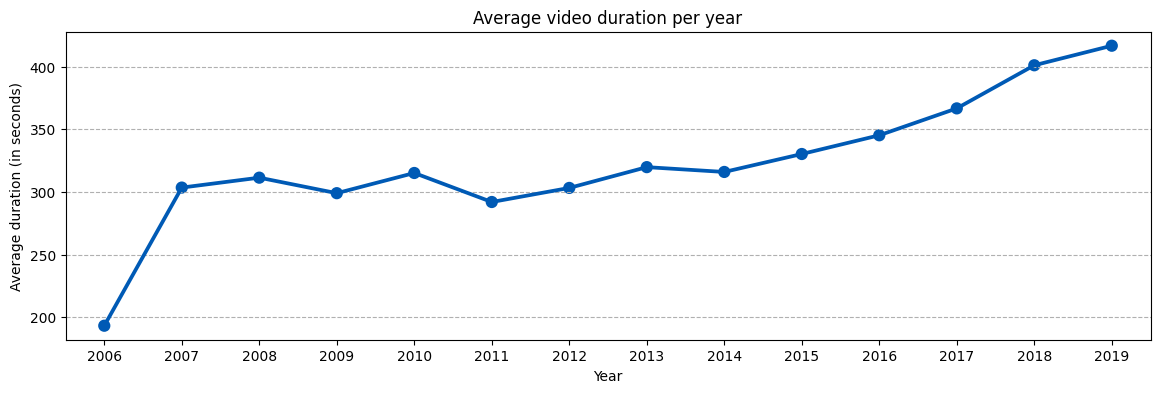

In [11]:
# Plot : Average video duration per year
# Set up the subplots with the figure size (14,4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 4))
sns.pointplot(x=df_vd_tech_modif_duration.index,
              y='average_duration',
              errwidth=1.5,
              data=df_vd_tech_modif_duration,
              ax=axes,
              color='#005AB5')
axes.set_title('Average video duration per year')
axes.set_ylabel('Average duration (in seconds)')
axes.set_xlabel('Year')
axes.grid(axis='y', linestyle='--')

We see from the above plot that the length of youtube videos has been increasing over the years: it went from 200 seconds (~3.3 minutes) in 2006 to more than 400 seconds (~6.6 minutes) in 2019 on average. This can be explained by the various technological advancements (bigger memory space to store and upload the videos, better camera battery, camera portability, etc), and to the higher creativity youtubers have to film longer videos that have more content.

In [12]:
#smooth all videos' durations by adding 1 so that we avoid having 0 view count, 
#and are able to compute the like_count_ratio later on
df_vd_tech_filtered = df_vd_tech_modif.copy()
df_vd_tech_filtered["view_count"] = df_vd_tech_filtered["view_count"] + 1

In [13]:
#correlation between like count and duration
df_vd_tech_filtered["like_count_ratio"] = df_vd_tech_filtered['like_count']/df_vd_tech_filtered["view_count"]
pearson_like_duration_corrs = []
spearmanr_like_duration_corrs = []

years = np.unique(df_vd_tech_filtered["upload_date"])
for year in years:
    #compute pearson correlation
    df = df_vd_tech_filtered[df_vd_tech_filtered["upload_date"]==year].dropna()
    corr = stats.pearsonr(df["duration"], df['like_count_ratio'])
    pearson_like_duration_corrs.append(corr)
    #compute spearman correaltion
    corr = stats.spearmanr(df["duration"], df['like_count_ratio'])
    spearmanr_like_duration_corrs.append(corr)
    

In [14]:
df_corrs_pearson = pd.DataFrame(pearson_like_duration_corrs, columns=["pearson_corr", "p_value"], index=years) 

In [15]:
df_corrs_pearson

,pearson_corr,p_value
2006,0.755824,3.005602e-02
2007,0.240388,8.090712e-04
2008,0.093102,2.703749e-03
2009,0.135980,2.057878e-09
2010,0.056322,2.461347e-04
2011,0.014682,2.242636e-01
2012,0.014586,1.125369e-01
2013,-0.006258,4.626152e-01
2014,0.066133,2.710243e-16
2015,0.025462,7.676664e-04


<Axes: ylabel='pearson_corr'>

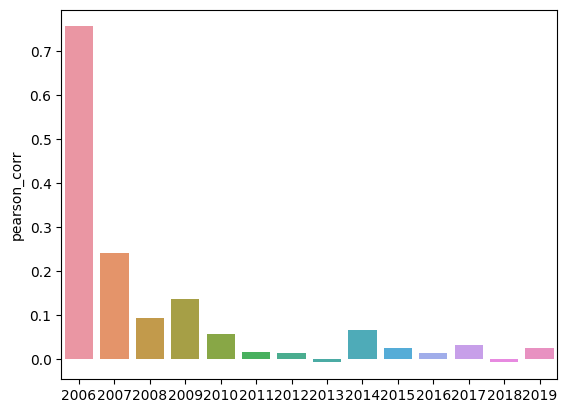

In [16]:
#plot the pearson's correaltions between likes and duration per year
sns.barplot(df_corrs_pearson, x=df_corrs_pearson.index, y="pearson_corr")

In [17]:
df_corrs_spearman = pd.DataFrame(spearmanr_like_duration_corrs, columns=["spearman_corr", "p_value"], index=years) 

In [18]:
df_corrs_spearman

,spearman_corr,p_value
2006,0.238095,5.701563e-01
2007,0.415445,2.284128e-09
2008,0.282579,1.792154e-20
2009,0.257485,1.482838e-30
2010,0.249298,5.482089e-61
2011,0.275452,1.431063e-119
2012,0.144611,2.455700e-56
2013,0.164663,2.332540e-84
2014,0.198180,3.219051e-135
2015,0.150648,4.031364e-89


<Axes: ylabel='spearman_corr'>

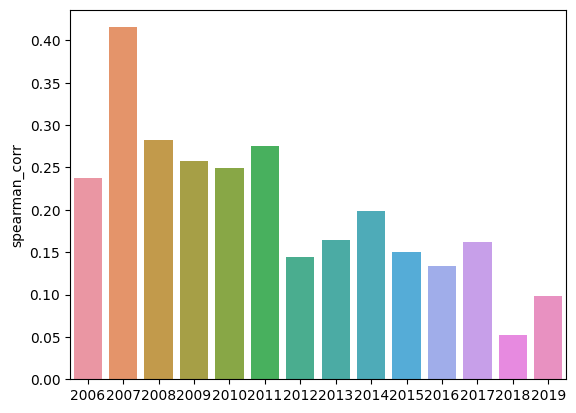

In [19]:
#plot the spearman's correaltions between likes and duration per year
sns.barplot(df_corrs_spearman, x=df_corrs_spearman.index, y="spearman_corr")

There is a relatively high positive correaltion (that is decreasing across the years), but significant (p_value < 0.05) between the duration of a video and the number of likes it gets. This is different from causation (i.e this does NOT mean that by uploading a longer video we will get more likes) but this nonetheless means that with longer videos we tend to have a bigger number of likes.

In [20]:
#correlation between dislike count and duration
df_vd_tech_filtered["dislike_count_ratio"] = df_vd_tech_filtered['dislike_count']/df_vd_tech_filtered["view_count"]
pearson_dislike_duration_corrs = []
spearmanr_dislike_duration_corrs = []

years = np.unique(df_vd_tech_filtered["upload_date"])
for year in years:
    #compute pearson correlation
    df = df_vd_tech_filtered[df_vd_tech_filtered["upload_date"] == year].dropna()
    corr = stats.pearsonr(df["duration"], df['dislike_count_ratio'])
    pearson_dislike_duration_corrs.append(corr)
    #compute spearman correlation
    corr = stats.spearmanr(df["duration"], df['dislike_count_ratio'])
    spearmanr_dislike_duration_corrs.append(corr)
    

In [21]:
df_corrs_pearson = pd.DataFrame(pearson_dislike_duration_corrs, columns=["pearson_corr", "p_value"], index=years) 

In [22]:
df_corrs_pearson

,pearson_corr,p_value
2006,0.088428,8.350592e-01
2007,-0.032040,6.599274e-01
2008,0.034981,2.606288e-01
2009,0.013113,5.651050e-01
2010,-0.059953,9.500677e-05
2011,-0.024809,4.000442e-02
2012,-0.041628,5.883508e-06
2013,-0.030312,3.723424e-04
2014,-0.035476,1.145941e-05
2015,-0.035303,3.084437e-06


<Axes: ylabel='pearson_corr'>

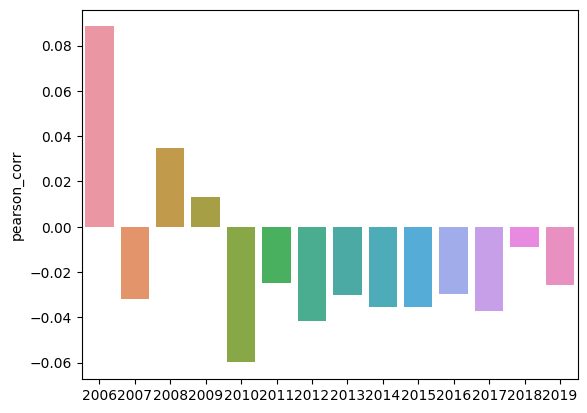

In [23]:
#plot the pearson's correaltions between dislikes and duration per year
sns.barplot(df_corrs_pearson, x=df_corrs_pearson.index, y="pearson_corr")

In [24]:
df_corrs_spearman = pd.DataFrame(spearmanr_dislike_duration_corrs, columns=["spearman_corr", "p_value"], index=years) 

In [25]:
df_corrs_spearman

,spearman_corr,p_value
2006,0.142857,7.357649e-01
2007,0.130972,7.092211e-02
2008,0.128311,3.441791e-05
2009,0.099278,1.265144e-05
2010,0.073787,1.540931e-06
2011,0.085225,1.585756e-12
2012,-0.013935,1.295170e-01
2013,0.038612,5.785664e-06
2014,0.059105,2.593125e-13
2015,0.041188,5.227389e-08


<Axes: ylabel='spearman_corr'>

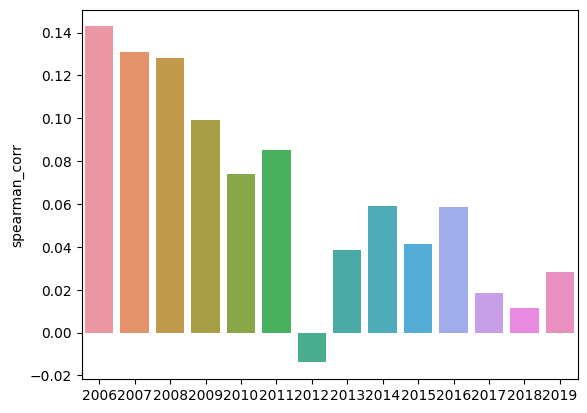

In [26]:
#plot the spearman's correaltions between dislikes and duration per year
sns.barplot(df_corrs_spearman, x=df_corrs_spearman.index, y="spearman_corr")

We notice that there is a either really small (les than 0.14) positive correlation of a negative one (pearson and spearman) between the duration of a video and the number of dislikes it gets. Theses correlations are however significant (p_value < 0.05). This is different from causation (i.e this does NOT mean that by uploading a longer video we will get less dislikes) but this nonetheless means that with longer videos we tend to have less number of dislikes.

In [27]:
#take a random sample of 100 videos 
sample = df_vd_tech_filtered.sample(100)

Text(0.5, 0, 'Duration')

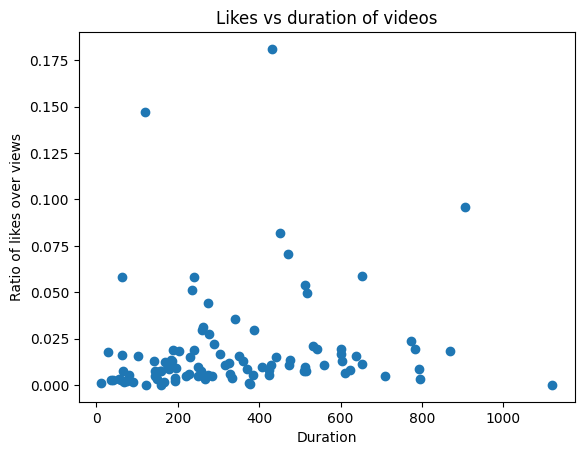

In [28]:
plt.scatter(sample["duration"], sample['like_count_ratio'])
plt.title(
    'Likes vs duration of videos')
plt.ylabel('Ratio of likes over views')
plt.xlabel('Duration')

Text(0.5, 0, 'Duration')

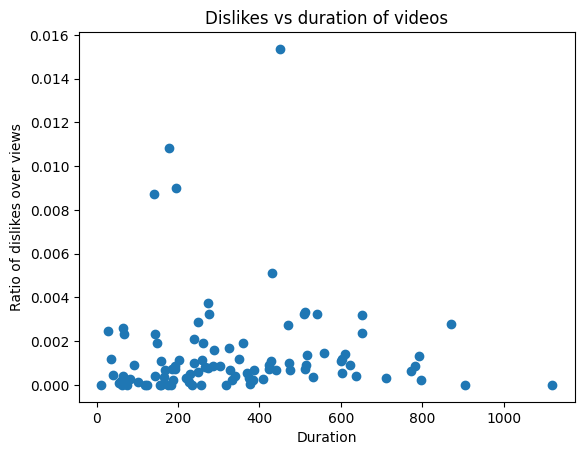

In [29]:
plt.scatter(sample["duration"], sample['dislike_count_ratio'])
plt.title(
    'Dislikes vs duration of videos')
plt.ylabel('Ratio of dislikes over views')
plt.xlabel('Duration')

In [30]:
#compute the ratio of likes to dislikes but first smooth number of dislikes to avoid dividing by 0
df_vd_tech["smoothed_dislikes_count"] = df_vd_tech["dislike_count"] + 1
df_vd_tech["like_dislike_ratio"] = df_vd_tech["like_count"]/df_vd_tech["smoothed_dislikes_count"]

In [31]:
#group videos per channel and compute the average duration and like to dislike ratio (per channel). 
#Sort by the latter and get the top 50 and bottom 50 like to dislike ratios and compute the average of 
#their duration averages (macro average). Note that by computing average per channel we give every channel the same weight.
df_vd_tech_sorted = df_vd_tech.groupby("channel_id")[["duration", "like_dislike_ratio"]].mean().sort_values(by='like_dislike_ratio', ascending=False)
df_vd_tech_sorted.head(50).duration.mean(), df_vd_tech_sorted.tail(50).duration.mean()

(451.66547619047617, 329.8347222222222)

We see that for the top channels (the ones that have a higher like to dislike ratio on their videos) have longer videos on average (451 seconds ~ 7.5 minutes compared to 329 seconds ~ 5.5 minutes)

In [32]:
#fill na values for like_dislike ratio and sort by duration to further plot the moving average of like to dislike ratio.
df_vd_tech_sorted.like_dislike_ratio.fillna(0,inplace=True)
df_vd_tech_sorted.sort_values(by='duration')

,duration,like_dislike_ratio
channel_id,,
UCC35ahKuGjVvVPKV3HFQS0Q,2.0,7.250000
UCVqkmUtgCxrqRMNIME4h7pQ,2.0,7.000000
UCW_SKBwR1TMaclnvDfkezwQ,3.0,11.000000
UC3g9PX_YLKjwg-reFdAAGAQ,3.0,9.000000
UCA02cSK6-fQpQ9yv6oNY4bw,4.0,1.500000
...,...,...
UCUvPIajgtMRapB3K9_w1DcA,1187.0,0.000000
UCnX9bUmrW5AI0Kr1C1IqBsQ,1187.0,144.600000
UClNjG4-zYTveXJYl4f-ZMqA,1188.0,37.166667


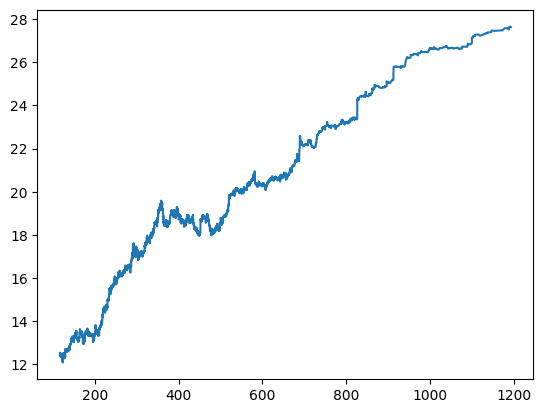

In [33]:
#plot the MA of the like to dislike ratio with a window size of 1000
y = df_vd_tech_sorted.sort_values(by='duration')["like_dislike_ratio"].rolling(1000).mean().values
x = df_vd_tech_sorted.sort_values(by='duration').duration
plt.plot(x, y)

From this plot we see that the moving average of the ratio of likes over dislikes, has been increasing from 2005 to 2019, for videos of length in the range (0, 20min ~ 1200seconds). This is because with more time, youtubers get the chance to talk about/show more content and thus have more chance of touch on subjects that are of interest to their viewers which in turn will allow the viewers to engage with the youtubers more and nudge them to put a like on the video. In contrast, with a shorter video, everything goes so fast, the content can't be of a high quality which makes viewers not like it. 

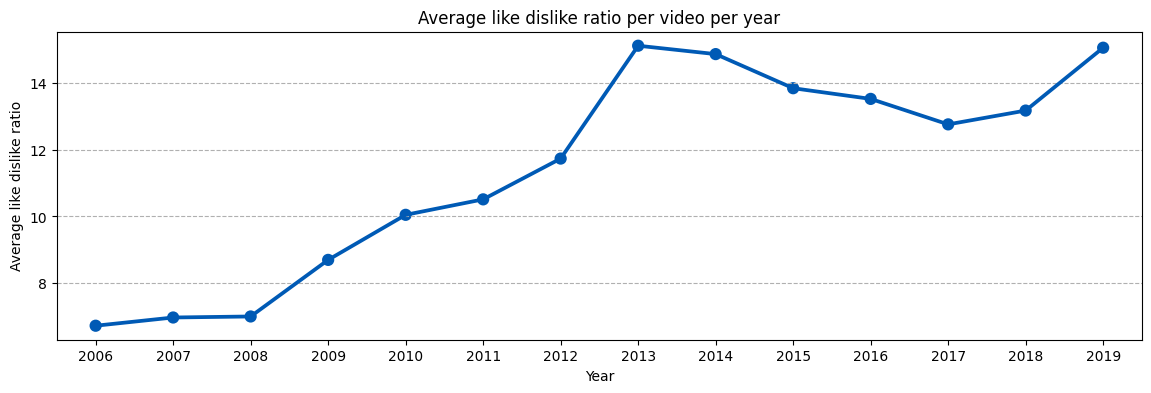

In [34]:
# Plot : Average like dislike ratio per video per year
# Set up the subplots with the figure size (14,4)
df_vd_tech_avg_like_dislike = df_vd_tech.copy()
df_vd_tech_avg_like_dislike["upload_date"] = df_vd_tech_avg_like_dislike.apply(lambda x: x["upload_date"].strftime("%Y"), axis=1)
df_vd_tech_avg_like_dislike = df_vd_tech_avg_like_dislike.groupby("upload_date")[["like_dislike_ratio"]].mean()
df_vd_tech_avg_like_dislike.columns = ['average_like_dislike_ratio']              
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 4))
sns.pointplot(x=df_vd_tech_avg_like_dislike.index,
              y=df_vd_tech_avg_like_dislike['average_like_dislike_ratio'],
              errwidth=1.5,
              data=df_vd_tech_avg_like_dislike,
              ax=axes,
              color='#005AB5')
axes.set_title('Average like dislike ratio per video per year')
axes.set_ylabel('Average like dislike ratio')
axes.set_xlabel('Year')
axes.grid(axis='y', linestyle='--')

In [35]:
df_vd_tech_avg_like_dislike

,average_like_dislike_ratio
upload_date,
2006,6.724419
2007,6.971207
2008,7.001964
2009,8.698758
2010,10.050139
2011,10.513979
2012,11.736996
2013,15.121284
2014,14.869957


We see from the previous plot that the number of likes compared to the number of dislikes has been increasing across the years. 
Combining this insight with the previous plots that showed that the number of likes and number of dislikes have also been increasing across the years, we can conclude that the number of likes increased more/faster than the number of dislikes, meaning the quality of the videos increased across the years, and the number of users increased (in general there are more positive people than negative and so by increasing the overall number of users we increase the share of positive people thus leading to higher number of likes). 